In [ ]:
pip install keras-tcn

     |████████████████████████████████| 1.1 MB 4.8 MB/s 
     |████████████████████████████████| 462 kB 45.9 MB/s 


In [ ]:
'''
from google.colab import drive 
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from keras import losses
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input, Dropout, Embedding, LSTM, Flatten, Conv1D, Dense, Flatten, Activation, UpSampling1D, MaxPooling1D, ZeroPadding1D
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.utils.vis_utils import plot_model
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_auc_score, classification_report

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import *
from keras.utils.np_utils import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, plot_precision_recall_curve, precision_recall_curve, average_precision_score
import seaborn as sns
import sys
from tqdm import tqdm
import os 
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline


In [ ]:
df= pd.read_csv('Data/data.csv' , sep = ',')

In [ ]:
# First 5 sample rows of Dataset
df.head()

,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count,web_traffic,label
0,8451,2870,422,1,10,0,0,0,0,0,0,0,0,0,1
1,5741,102,295,1,11,0,0,0,0,0,0,0,0,0,1
2,8419,345,720,1,9,0,0,0,0,0,0,0,0,0,1
3,7695,2166,545,1,9,0,0,0,0,0,0,0,0,0,1
4,9316,2455,6,1,6,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Name of columns
list(df.columns)

['whois_regDate',
 'whois_expDate',
 'whois_updatedDate',
 'dot_count',
 'url_len',
 'digit_count',
 'special_count',
 'hyphen_count',
 'double_slash',
 'single_slash',
 'at_the_rate',
 'protocol',
 'protocol_count',
 'web_traffic',
 'label']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   whois_regDate      11000 non-null  int64
 1   whois_expDate      11000 non-null  int64
 2   whois_updatedDate  11000 non-null  int64
 3   dot_count          11000 non-null  int64
 4   url_len            11000 non-null  int64
 5   digit_count        11000 non-null  int64
 6   special_count      11000 non-null  int64
 7   hyphen_count       11000 non-null  int64
 8   double_slash       11000 non-null  int64
 9   single_slash       11000 non-null  int64
 10  at_the_rate        11000 non-null  int64
 11  protocol           11000 non-null  int64
 12  protocol_count     11000 non-null  int64
 13  web_traffic        11000 non-null  int64
 14  label              11000 non-null  int64
dtypes: int64(15)
memory usage: 1.3 MB


In [ ]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

whois_regDate has 4038 unique values
whois_expDate has 1872 unique values
whois_updatedDate has 1146 unique values
dot_count has 19 unique values
url_len has 347 unique values
digit_count has 128 unique values
special_count has 35 unique values
hyphen_count has 32 unique values
double_slash contains:			[0 1 5 3 6 2]
single_slash has 25 unique values
at_the_rate contains:			[0 1 3 2]
protocol contains:			[0 1]
protocol_count contains:			[0 1 2 5 6 3]
web_traffic contains:			[0 1]
label contains:			[1 0]


1    5500
0    5500
Name: label, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


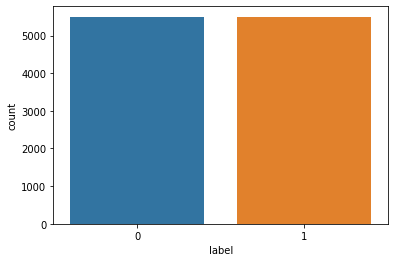

In [ ]:
print(df['label'].value_counts())
sns.countplot(df['label'])

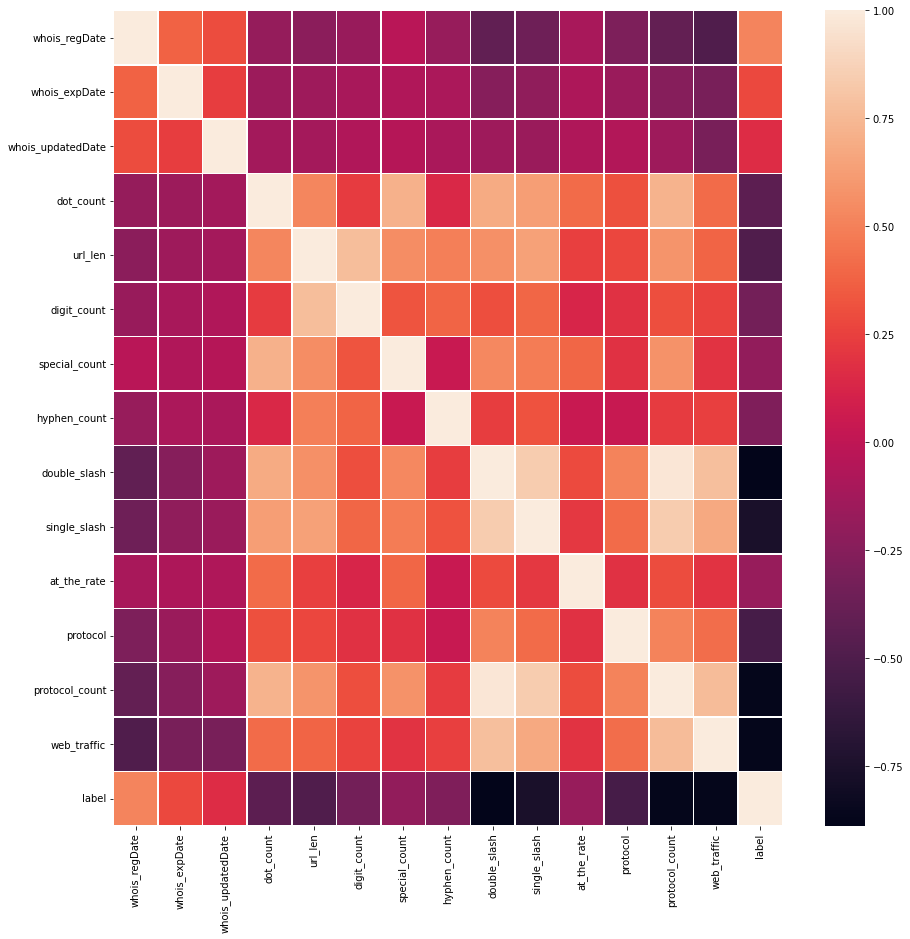

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

In [ ]:
dataset = df.values
x = dataset[:,:-1]
y = dataset[:, -1]

In [ ]:
print(x.shape)
print(y.shape)

(11000, 14)
(11000,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=808)

In [ ]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)
input_shape = (x_train.shape[1], 1)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(8250, 14, 1)
(2750, 14, 1)


In [ ]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(8250, 14, 1)
y_train:(8250, 2)

x_test:(2750, 14, 1)
y_test:(2750, 2)

input_shape:(14, 1)



In [ ]:
import tcn
from tcn import TCN
def phishing():
  input_layer = Input(shape=(input_shape ))
  batch_size, time_steps, input_dim = None, 14, 1

  tcn_layer = TCN(input_shape=(time_steps, input_dim))
  model = Sequential([
    tcn_layer,
    Dense(1, activation='sigmoid')
   ]) 

  model.compile(loss="binary_crossentropy",
              optimizer="adam",
           metrics=["accuracy"])

 
  return model


In [ ]:
modi = KerasClassifier(build_fn=phishing,
                        epochs=10,
                        batch_size=128, verbose=1)

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cv_results=cross_val_score(modi,
                           x, y,
                           cv=kfold, verbose=1
                           )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
78/78 [==============================] - 15s 128ms/step - loss: 68.2132 - accuracy: 0.7845
Epoch 2/10
78/78 [==============================] - 9s 120ms/step - loss: 8.9806 - accuracy: 0.8877
Epoch 3/10
78/78 [==============================] - 10s 123ms/step - loss: 2.0477 - accuracy: 0.9443
Epoch 4/10
78/78 [==============================] - 10s 123ms/step - loss: 1.5125 - accuracy: 0.9564
Epoch 5/10
78/78 [==============================] - 9s 120ms/step - loss: 0.9871 - accuracy: 0.9780
Epoch 6/10
78/78 [==============================] - 9s 120ms/step - loss: 0.8592 - accuracy: 0.9867
Epoch 7/10
78/78 [==============================] - 9s 120ms/step - loss: 0.1406 - accuracy: 0.9972
Epoch 8/10
78/78 [==============================] - 9s 120ms/step - loss: 0.0390 - accuracy: 0.9990
Epoch 9/10
78/78 [==============================] - 9s 119ms/step - loss: 1.1076 - accuracy: 0.9900
Epoch 10/10
9/9 [==============================] - 1s 31ms/step - loss: 2.7479e-20 - accuracy: 1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 18.8min finished


In [ ]:
print('The average cross-validation accuracy is: ', round(cv_results.mean(), 4))

The average cross-validation accuracy is:  0.9979


In [ ]:
print('The standard deviation for the cross-validation accuracy measure is: ', round(cv_results.std(), 4))

The standard deviation for the cross-validation accuracy measure is:  0.0028


In [ ]:
print('The five cross-validation accuracy results are: \n', cv_results)

The five cross-validation accuracy results are: 
 [1.         1.         0.99909091 0.99727273 1.         0.99909091
 0.9909091  0.99818182 1.         0.99454546]


In [ ]:
# making predictions based on a five fold cross-validation
cv_preds = cross_val_predict(modi,x,y, cv=kfold, verbose=0)
cv_preds

Epoch 1/10
78/78 [==============================] - 14s 124ms/step - loss: 111.5179 - accuracy: 0.7378
Epoch 2/10
78/78 [==============================] - 9s 120ms/step - loss: 3.2597 - accuracy: 0.9264
Epoch 3/10
78/78 [==============================] - 9s 120ms/step - loss: 4.1766 - accuracy: 0.9299
Epoch 4/10
78/78 [==============================] - 9s 120ms/step - loss: 1.3643 - accuracy: 0.9785
Epoch 5/10
78/78 [==============================] - 10s 127ms/step - loss: 0.2488 - accuracy: 0.9931
Epoch 6/10
78/78 [==============================] - 9s 120ms/step - loss: 0.5235 - accuracy: 0.9901
Epoch 7/10
78/78 [==============================] - 9s 120ms/step - loss: 0.4205 - accuracy: 0.9931
Epoch 8/10
78/78 [==============================] - 9s 121ms/step - loss: 0.2074 - accuracy: 0.9965
Epoch 9/10
78/78 [==============================] - 9s 120ms/step - loss: 1.1793 - accuracy: 0.9902
Epoch 10/10
78/78 [==============================] - 9s 120ms/step - loss: 0.2138 - accuracy: 0.

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
#confusion matrix of the cross validation results & the actual values
cm = confusion_matrix(y, cv_preds)
print(cm)

[[5491    9]
 [   0 5500]]


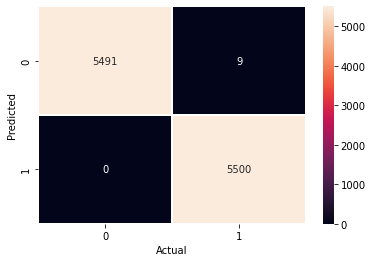

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', linewidths=0.5, xticklabels=True, yticklabels=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
target_names = ['legitime', 'phishing']
print(classification_report(y, cv_preds,target_names=target_names ))

              precision    recall  f1-score   support

    legitime       1.00      1.00      1.00      5500
    phishing       1.00      1.00      1.00      5500

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000



In [ ]:
acc = accuracy_score(y, cv_preds)
f1s = f1_score(y, cv_preds)
precis = precision_score(y, cv_preds, average='binary')
rec = recall_score(y, cv_preds, average='binary')
auc = roc_auc_score(y, cv_preds)


print('The accuracy score for the model is: \n', acc)
print('The F1 score for the model is: \n', f1s)
print('The precision-recall score is: {0:0.3f}'.format(precis))
print('The recall score is: %.3f' % rec)
print('Neural Network: ROC AUC=%.3f' % (auc))

The accuracy score for the model is: 
 0.9991818181818182
The F1 score for the model is: 
 0.9991824870560451
The precision-recall score is: 0.998
The recall score is: 1.000
Neural Network: ROC AUC=0.999


In [ ]:
fpr, tpr, thresholds = roc_curve(y, cv_preds)

NameError: ignored

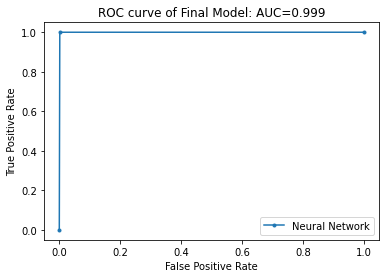

In [ ]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='Neural Network')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Final Model", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Final Model: AUC=0.998')

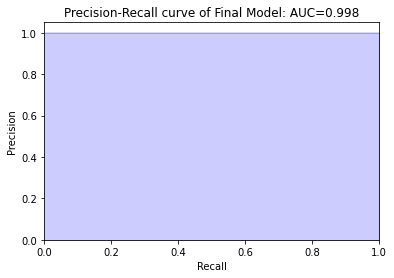

In [ ]:
# Calculating values
precision, recall, thresholds = precision_recall_curve(y, cv_preds)
test_average_precision = average_precision_score(y, cv_preds)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Final Model", str_average_precision))